In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('premiums.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


### Handling NA values

In [7]:
# Checking for NA values
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [8]:
# dropping rows with na feature values
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [12]:
# Showing all the negative values from number_of_dependants column
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

In [13]:
# making negative values of number_of_dependants positive
df['number_of_dependants'] = abs(df['number_of_dependants'])

In [14]:
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

### Data Visualization

In [15]:
# Filtering out all the numeric columns
num_columns = df.select_dtypes(['float64', 'int64']).columns

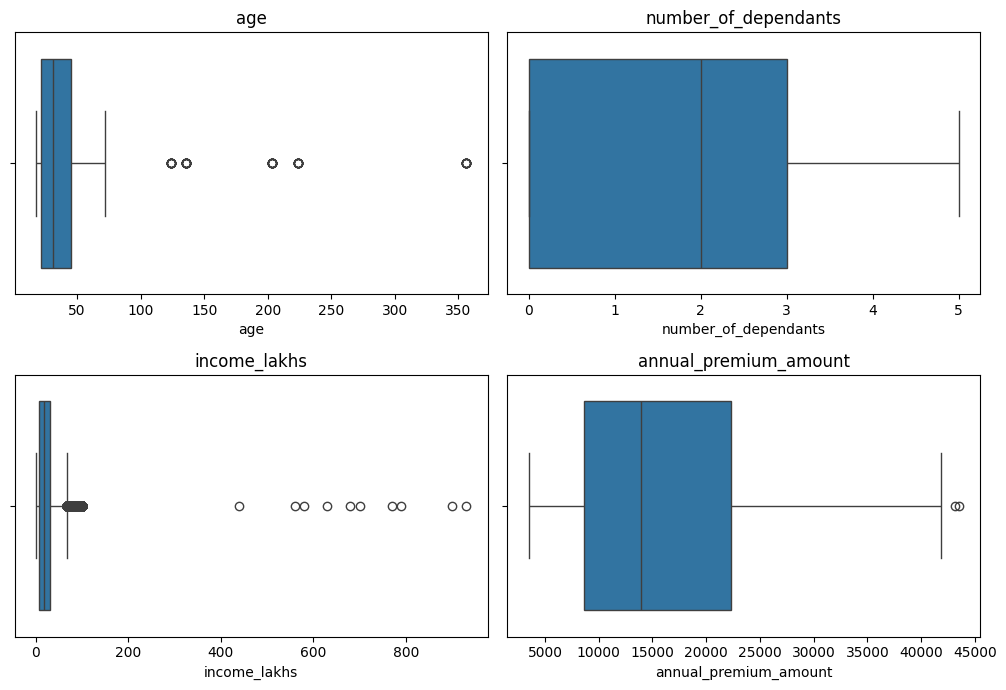

In [16]:
# Plotting box plot
plt.figure(figsize=(10, 7))

for i, column in enumerate(num_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [17]:
# Analyzing the outliers of age column
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [18]:
df1 = df[df['age']<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


In [19]:
# Analyzing the outliers for 'income_lakhs' feature
# using quantile to set a reasonable threshold

income_quantile_threshold = df1.income_lakhs.quantile(0.999).copy()
print('income quantile threshold is:',income_quantile_threshold)

df2 = df1[df1.income_lakhs<=income_quantile_threshold].copy()
df2.income_lakhs.describe()

income quantile threshold is: 100.0


count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

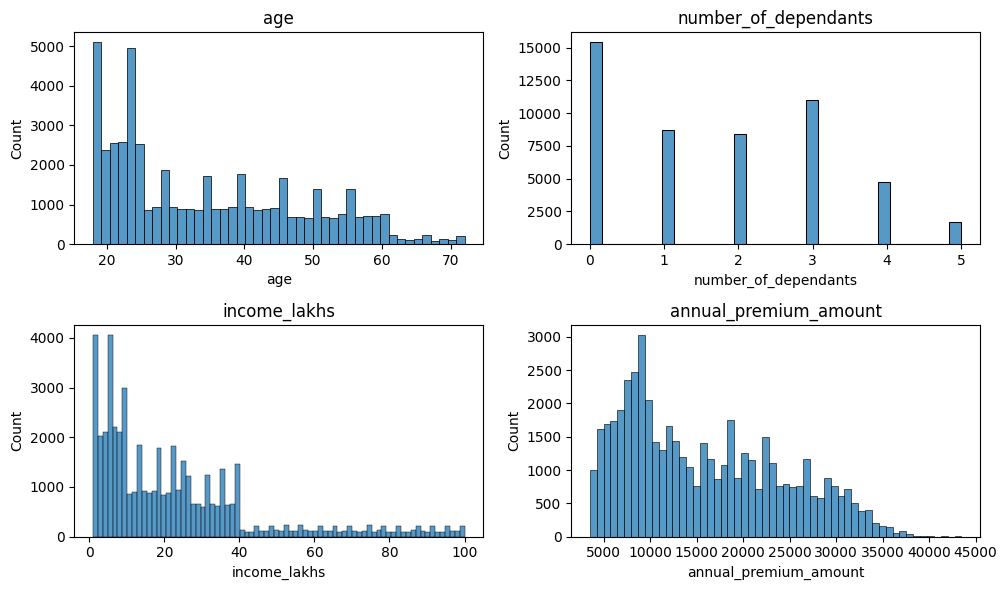

In [20]:
# Data Visualization

plt.figure(figsize=(10, 6))

for i, col in enumerate(num_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [21]:
categorical_columns = ['income_level', 'employment_status', 'smoking_status', 'bmi_category', 'marital_status', 'gender', 'region', 'medical_history', 'insurance_plan']

for col in categorical_columns:
    print(col, df2[col].unique())

# Something fishy in smoking_status feature

income_level ['<10L' '10L - 25L' '> 40L' '25L - 40L']
employment_status ['Salaried' 'Self-Employed' 'Freelancer']
smoking_status ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
bmi_category ['Normal' 'Obesity' 'Overweight' 'Underweight']
marital_status ['Unmarried' 'Married']
gender ['Male' 'Female']
region ['Northwest' 'Southeast' 'Northeast' 'Southwest']
medical_history ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ['Bronze' 'Silver' 'Gold']


In [22]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
})

df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional', 'Smoking=0',
       'Does Not Smoke', 'Not Smoking'], dtype=object)

In [23]:
gender_percentage = df2['gender'].value_counts(normalize=True)
gender_percentage

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

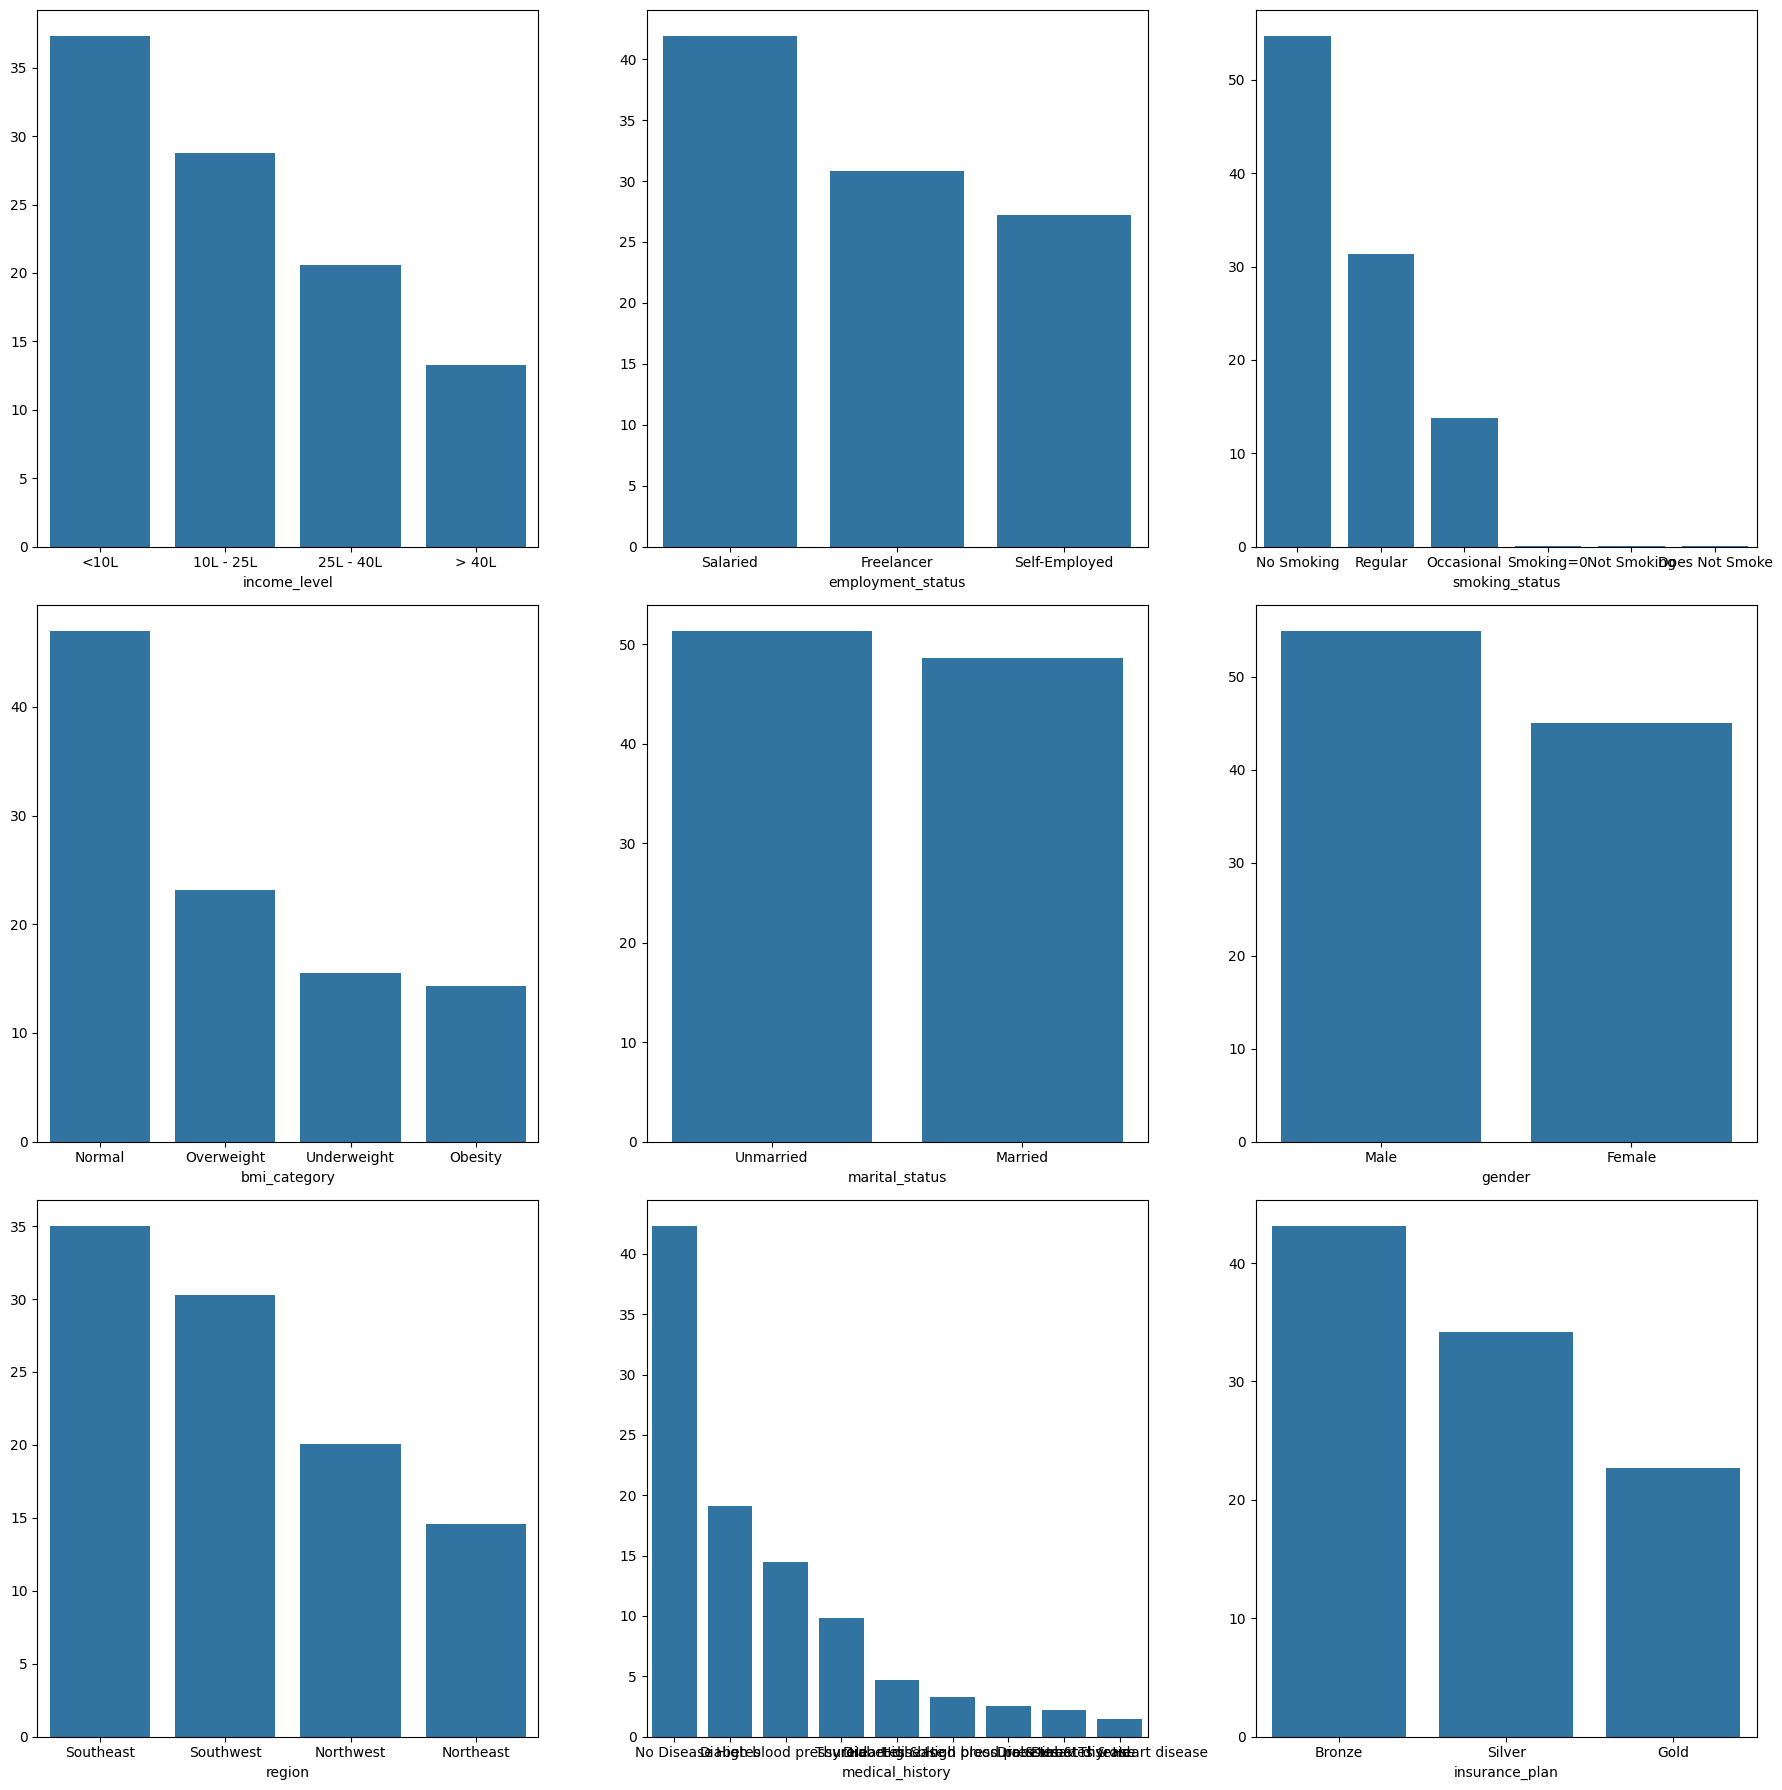

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()
for axx, column in zip(axes, categorical_columns):

    category_counts = df2[column].value_counts(normalize=True) * 100
    
    sns.barplot(x = category_counts.index, y = category_counts.values, ax=axx)

plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5314  3886    5189
25L - 40L         3686  2844    3753
<10L             12239   931    5495
> 40L              330  3662    2647


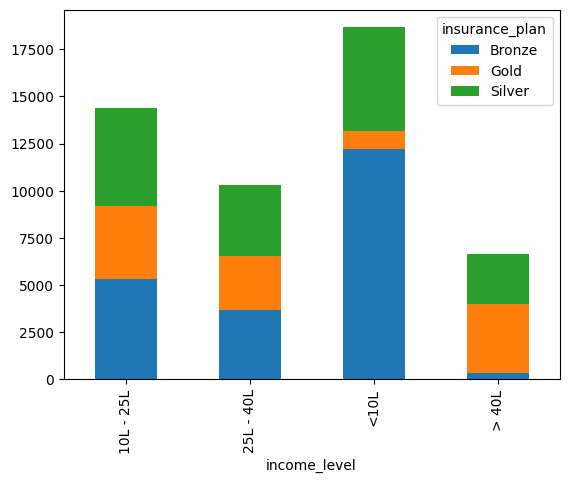

In [25]:
# For bivariate analysis
crosstab = pd.crosstab(df['income_level'], df['insurance_plan'])
print(crosstab)

crosstab.plot(kind='bar', stacked=True);

## Feature Engineering

In [26]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [27]:
# Let's create a column 'risk_score' for rating the risk according to existing diseases

risk_scores={
    "diabetes":6,
    "heart disease":8,
    "high blood pressure":6,
    "thyroid":5,
    "no disease":0,
    "none":0
}

In [28]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

In [29]:
df2['disease2'] = df2['disease2'].fillna('none')

In [30]:
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# normalizing the risk scores
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()

df2['normalized_risk_score'] = (df2['total_risk_score']-min_score)/(max_score-min_score)

df2['total_risk_score']
df2['disease1'].unique(), df2['disease2'].unique()

(array(['diabetes', 'high blood pressure', 'no disease', 'thyroid',
        'heart disease'], dtype=object),
 array(['none', 'high blood pressure', 'heart disease', 'thyroid'],
       dtype=object))

In [31]:
# Label encoding for insurance_plan and income level

df2['insurance_plan'] = df2.insurance_plan.map({'Bronze':1, 'Silver':2, 'Gold':3})

df2['income_level'] = df2.income_level.map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4})

In [32]:
# Doing one hot encoding for nominal columns

nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']

df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)

df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_No Smoking,smoking_status_Not Smoking,smoking_status_Occasional,smoking_status_Regular,smoking_status_Smoking=0,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,0,1,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,0,0,0,1,0,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,1,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,0,0,0,1,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,1,0,0,0,0,1,0,0,1


In [33]:
# Dropping unnecessary columns

df4 = df3.drop(['disease1', 'disease2', 'medical_history', 'total_risk_score'], axis=1)
df4

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,...,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_No Smoking,smoking_status_Not Smoking,smoking_status_Occasional,smoking_status_Regular,smoking_status_Smoking=0,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,0,3,35,1,9111,0.000000,0,1,0,...,0,0,1,1,0,0,0,0,0,1
49996,47,2,4,82,3,27076,0.357143,0,0,1,...,0,0,0,1,0,0,0,0,1,0
49997,21,0,3,32,1,8564,0.000000,1,1,0,...,0,0,0,0,0,0,1,0,0,0
49998,18,2,2,20,1,9490,0.000000,1,1,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
scaler = MinMaxScaler()

X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs']

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

X.describe()
df4.shape, X.shape, y.shape

((49908, 22), (49908, 21), (49908,))

In [35]:
# 'income_level' and 'income_lakhs' seems to have higher VIF, we can drop those columns

X_refined = df4.drop(['income_level'], axis=1)
X_refined.shape, y.shape

((49908, 21), (49908,))

## Model Training and Fine Tuning

In [42]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_refined, y, test_size=0.3, random_state=10)
print('X_train', X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test', y_test.shape)


X_train (34935, 21)
X_test (14973, 21)
y_train (34935,)
y_test (14973,)


### Training Linear Regression Model

In [40]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_model.score(X_test, y_test) # 100% !!!!!!!! LOL
linear_reg_model.score(X_train, y_train)

1.0